In [41]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
airline_tweets = pd.read_csv("/content/Tweets.csv")

In [43]:
# Display the first 5 rows
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [44]:
# Display the count of each unique value in the 'airline_sentiment' column
airline_tweets.airline_sentiment.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Data Analysis

In [45]:
# Get the current figure size settings from Matplotlib's configuration
plot_size = plt.rcParams["figure.figsize"]

# Print the current width of the figure
print(plot_size[0])

# Print the current height of the figure
print(plot_size[1])

# Set the desired width of the figure
plot_size[0] = 8

# Set the desired height of the figure
plot_size[1] = 6

# Apply the new figure size settings to Matplotlib's configuration
plt.rcParams["figure.figsize"] = plot_size

8.0
6.0


<Axes: ylabel='count'>

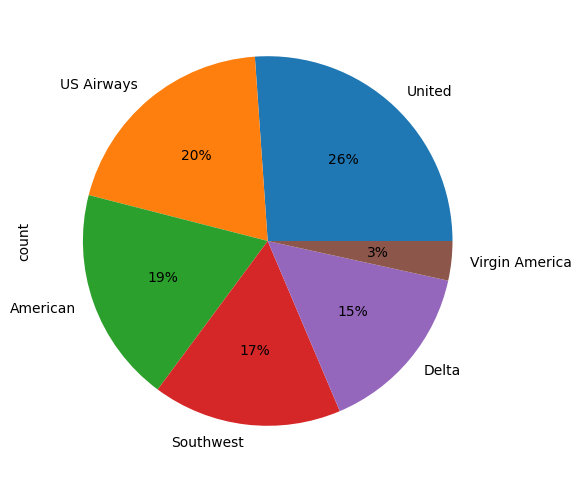

In [47]:
# Create a pie chart to show the distribution of unique values in the 'airline' column
# Display the percentage value on each pie slice with no decimal places
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

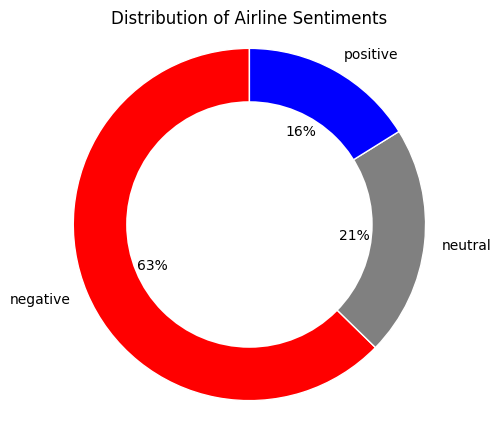

In [48]:
import matplotlib.pyplot as plt

# Calculate value counts
sentiment_counts = airline_tweets['airline_sentiment'].value_counts()

# Plotting a donut chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%', colors=["red", "grey", "blue"], startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add a circle at the center to turn it into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Airline Sentiments')

# Show plot
plt.show()

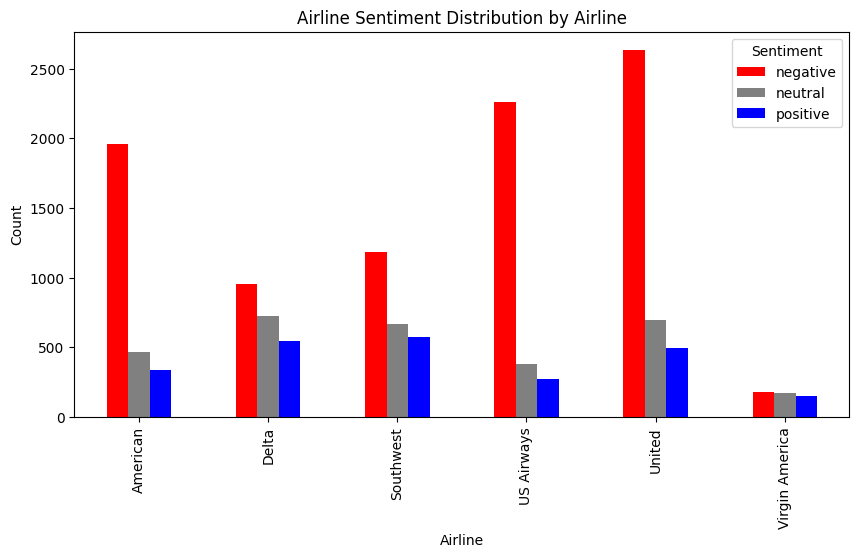

In [49]:
import matplotlib.pyplot as plt

# Grouping by 'airline' and 'airline_sentiment', and counting occurrences
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()

# Define custom colors for each sentiment category
colors = {'positive': 'blue', 'neutral': 'grey', 'negative': 'red'}

# Plotting grouped bar chart with custom colors
ax = airline_sentiment.plot(kind='bar', figsize=(10, 5), color=[colors[col] for col in airline_sentiment.columns])

# Adding labels and title
plt.title('Airline Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')

# Adding legend
plt.legend(title='Sentiment')

# Show plot
plt.show()

<ipython-input-50-1ed3b89ec861>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline_tweets, palette=palette)


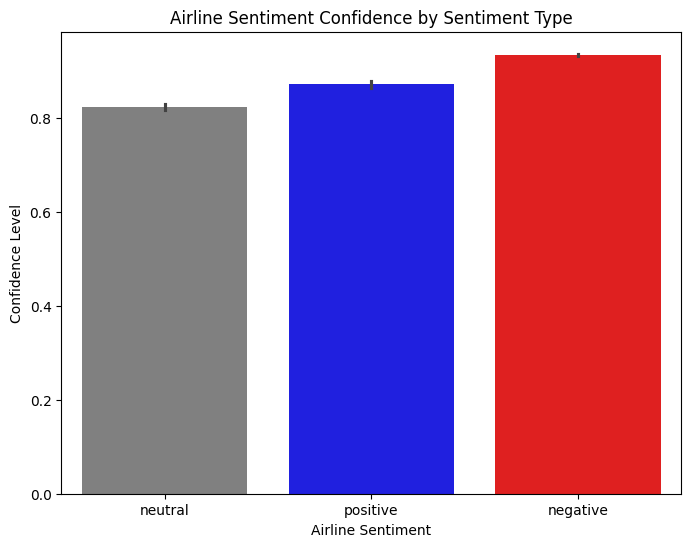

In [50]:
import seaborn as sns

# Define a color palette for different sentiment types
palette = {'negative': 'red', 'neutral': 'gray', 'positive': 'blue'}

# Create a bar plot showing the confidence levels for each sentiment type
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline_tweets, palette=palette)

# Adding title and labels
plt.title('Airline Sentiment Confidence by Sentiment Type')
plt.xlabel('Airline Sentiment')
plt.ylabel('Confidence Level')

# Show plot
plt.show()

In [51]:
#counting the total number of negative reasons
airline_tweets.negativereason.value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

Text(0, 0.5, 'No. of Tweets')

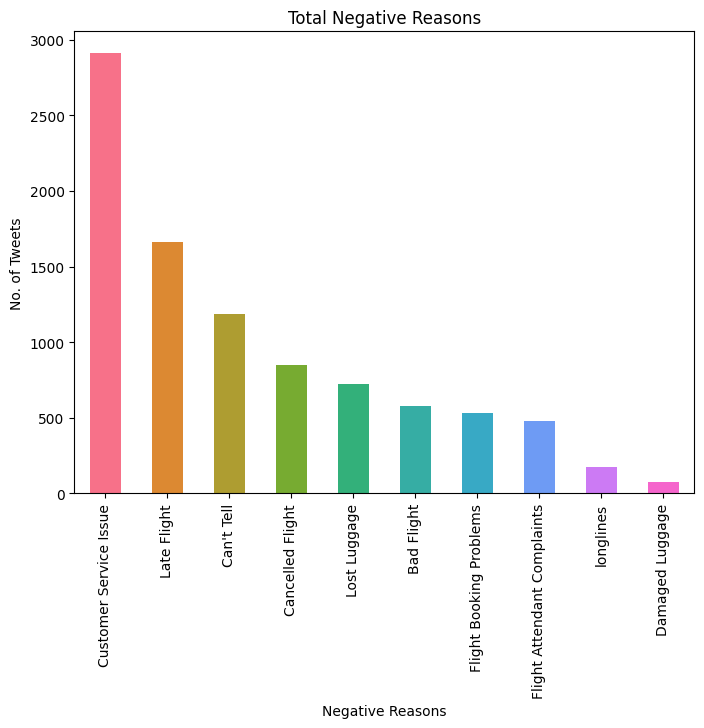

In [52]:
#Plotting all the negative reasons
color=sns.color_palette("husl", 10)
pd.Series(airline_tweets["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [53]:
# Create a cross-tabulation table to show the frequency of each sentiment type for each airline
air_senti=pd.crosstab(airline_tweets.airline, airline_tweets.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [54]:
# Calculate the percentage of each sentiment type for each airline
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


## Data Cleaning

In [55]:
# Extract the features (data to be used for model training or analysis)
# Assuming the 10th column contains the feature data
features = airline_tweets.iloc[:, 10].values

# Extract the labels (target values for classification or regression)
# Assuming the 1st column contains the label data
labels = airline_tweets.iloc[:, 1].values

# Display the features array
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [56]:
# Display the labels array
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [57]:
processed_features = [] # Initialize an empty list to store processed features

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    # Append the processed feature to the list
    processed_features.append(processed_feature)

In [29]:
processed_features

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

## TF-IDF

In [58]:
 # Download the NLTK stopwords dataset
nltk.download('stopwords')

# Import stopwords from NLTK
from nltk.corpus import stopwords

# Import TF-IDF vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# Convert processed features into TF-IDF matrix representation
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Dividing Data into Training and Test

In [60]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Random Forest

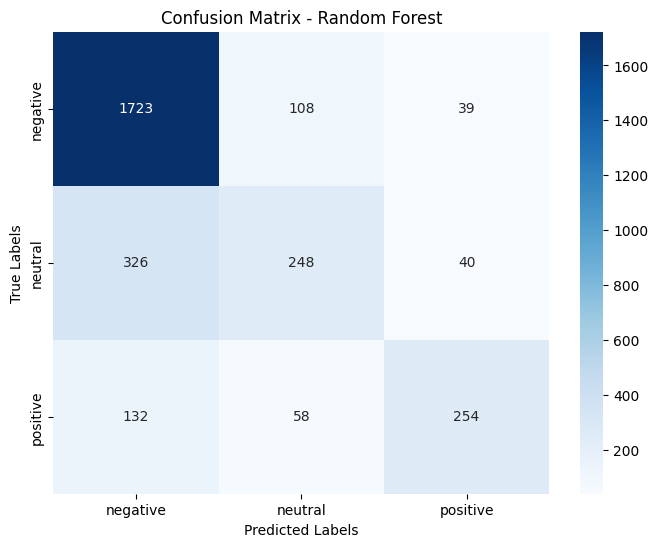

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy Score: 0.7599043715846995


In [63]:
import seaborn as sns #Import seaborn for plotting
import matplotlib.pyplot as plt  #Import matplotlib for plotting
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #Import evaluation metrics
from sklearn.ensemble import RandomForestClassifier #Import Random Forest classifier from scikit-learn

# Train the Random Forest model
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

# Make predictions
predictions = text_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(classification_report(y_test,predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

# Logistic Regression

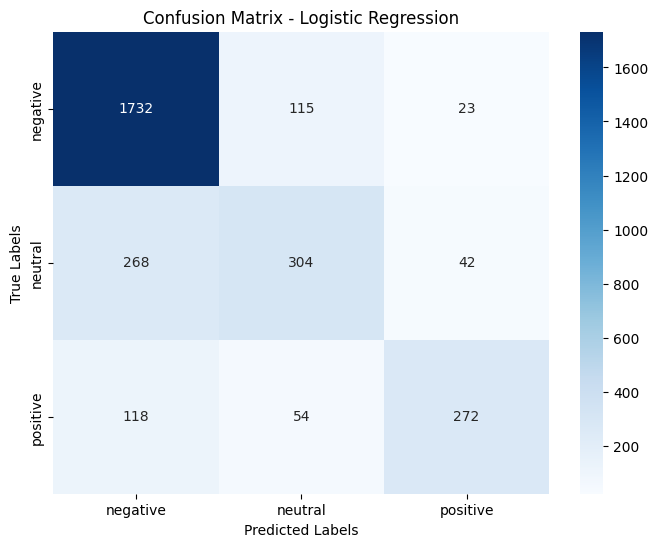

              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1870
     neutral       0.64      0.50      0.56       614
    positive       0.81      0.61      0.70       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

Accuracy Score: 0.7882513661202186


In [62]:
from sklearn.linear_model import LogisticRegression #Import Logistic Regression classifier from scikit-learn

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions3 = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions3)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print the classification report
print(classification_report(y_test, predictions3))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, predictions3))